In [3]:
import os
from fastcore.all import *
from fastai.vision.all import *

C:\Users\uqnpipe2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Acquisition

In [4]:
# Set relative path where GTZAN mel-spectrograms are stored
path = Path("../dev/spec")

# Check that files are intact
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

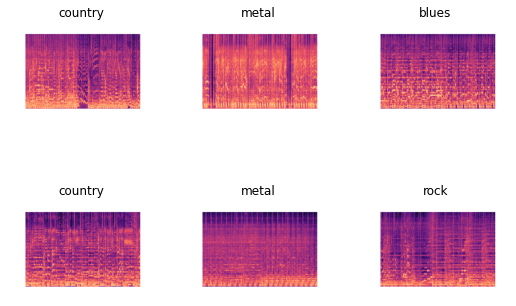

In [5]:
# Create datablock
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42069),
    get_y=parent_label
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

# Model Training

In [7]:
# Learn using Resnet18
learn = vision_learner(dls, resnet18, metrics=error_rate)

SuggestedLRs(valley=0.0012022644514217973)

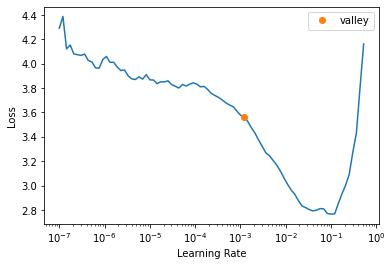

In [8]:
# Estimate learning rate to be used for training
learn.lr_find()

In [9]:
# Train model
learn.fine_tune(1, base_lr=9e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.389099,1.658346,0.435000,01:44


epoch,train_loss,valid_loss,error_rate,time
0,1.475773,1.373356,0.380000,02:17


SuggestedLRs(valley=0.00013182566908653826)

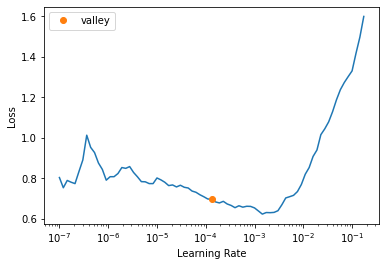

In [10]:
# Estimate new learning rate on trained model
learn.lr_find()

In [11]:
# Use new learning rate and fit one cycle training method
learn.fit_one_cycle(1, lr_max=10e-4)

epoch,train_loss,valid_loss,error_rate,time
0,1.149437,2.841945,0.465000,02:18


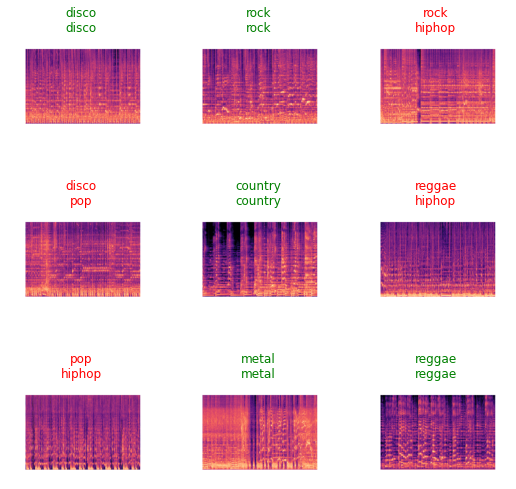

In [12]:
# See how the model performs
learn.show_results()

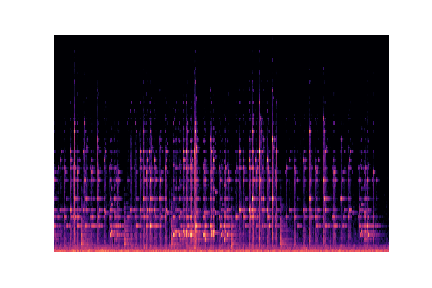

This is a classical track.
Probability it's not a classical track: 0.0000


In [19]:
# User input
input_image = PILImage.create("../dev/test/classical.png")
display(input_image)
genre,_,probs = learn.predict(input_image)
print(f"This is a {genre} track.")
print(f"Probability it's not a {genre} track: {probs[0]:.4f}")

# Export Trained Model

In [20]:
learn.export()